# Health-Care Capstone Project

## Step 1: Importing Basic Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Loading Data :

In [2]:
data = pd.read_csv('/Users/sneha/Desktop/Health Care/health care diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Step 3: Perform EDA on Data

In [3]:
#### Display the first 5 records
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3.1 Check for missing values 

In [6]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<AxesSubplot:title={'center':'Checking Missing Value with Heatmap'}>

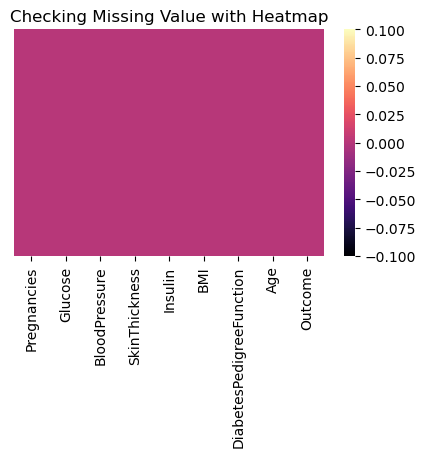

In [7]:
plt.figure(figsize=(5,3),dpi=100)
plt.title('Checking Missing Value with Heatmap')
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False)

## 3.2 : Handling values = 0 in column: Glucose,BMI, Blood Pressure, Skin Thickness and Insulin.

### Since a value 0 is also treated as a null value :

In [8]:
for i in data[['Glucose','BloodPressure','BMI','SkinThickness','Insulin']]:
    val = data[i].mean()
    data[i] = data[i].replace(0, val)

## 3.3 : Understanding the data type of variables : 

In [9]:
data_frame = data.dtypes.to_frame()
data_frame.rename(columns = {0:'data_type'}, inplace = True)
data_frame

,data_type
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


<AxesSubplot:>

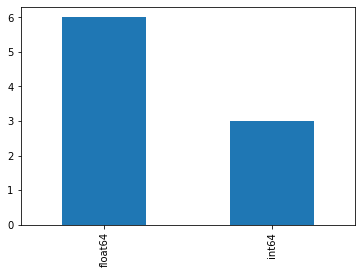

In [10]:
data_frame['data_type'].value_counts().plot(kind='bar')

## 3.4 : Understand the variables and their corresponding values

##### 3.4.1 : No. of unique values in each variable.

In [11]:
for i in data.columns:
    print(i,'---->',data[i].nunique())

Pregnancies ----> 17
Glucose ----> 136
BloodPressure ----> 47
SkinThickness ----> 51
Insulin ----> 186
BMI ----> 248
DiabetesPedigreeFunction ----> 517
Age ----> 52
Outcome ----> 2


##### 3.4.2 : List of unique values in each variable. 

In [12]:
for i in data.columns:
    print(i,'---->',data[i].unique(),'\n')

Pregnancies ----> [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14] 

Glucose ----> [148.          85.         183.          89.         137.
 116.          78.         115.         197.         125.
 110.         168.         139.         189.         166.
 100.         118.         107.         103.         126.
  99.         196.         119.         143.         147.
  97.         145.         117.         109.         158.
  88.          92.         122.         138.         102.
  90.         111.         180.         133.         106.
 171.         159.         146.          71.         105.
 101.         176.         150.          73.         187.
  84.          44.         141.         114.          95.
 129.          79.         120.89453125  62.         131.
 112.         113.          74.          83.         136.
  80.         123.          81.         134.         142.
 144.          93.         163.         151.          96.
 155.          76.         160.         124

##### 3.4.3 : Count of unique values in individual variables.

In [13]:
for i in data.columns:
    print(i,'---->',data[i].value_counts(),'\n')

Pregnancies ----> 1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64 

Glucose ----> 99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64 

BloodPressure ----> 70.000000     57
74.000000     52
78.000000     45
68.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
69.105469     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
86.000000     21
58.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
100.000000     3
106.000000     3
98.000000      3
110.0000

## Step 4 : Visually explore these variables using histograms , pair plots and Scatter Plots (to check for multi colinerty )


##### 4.1 : plotting the histogram : variables vs frequency of their values

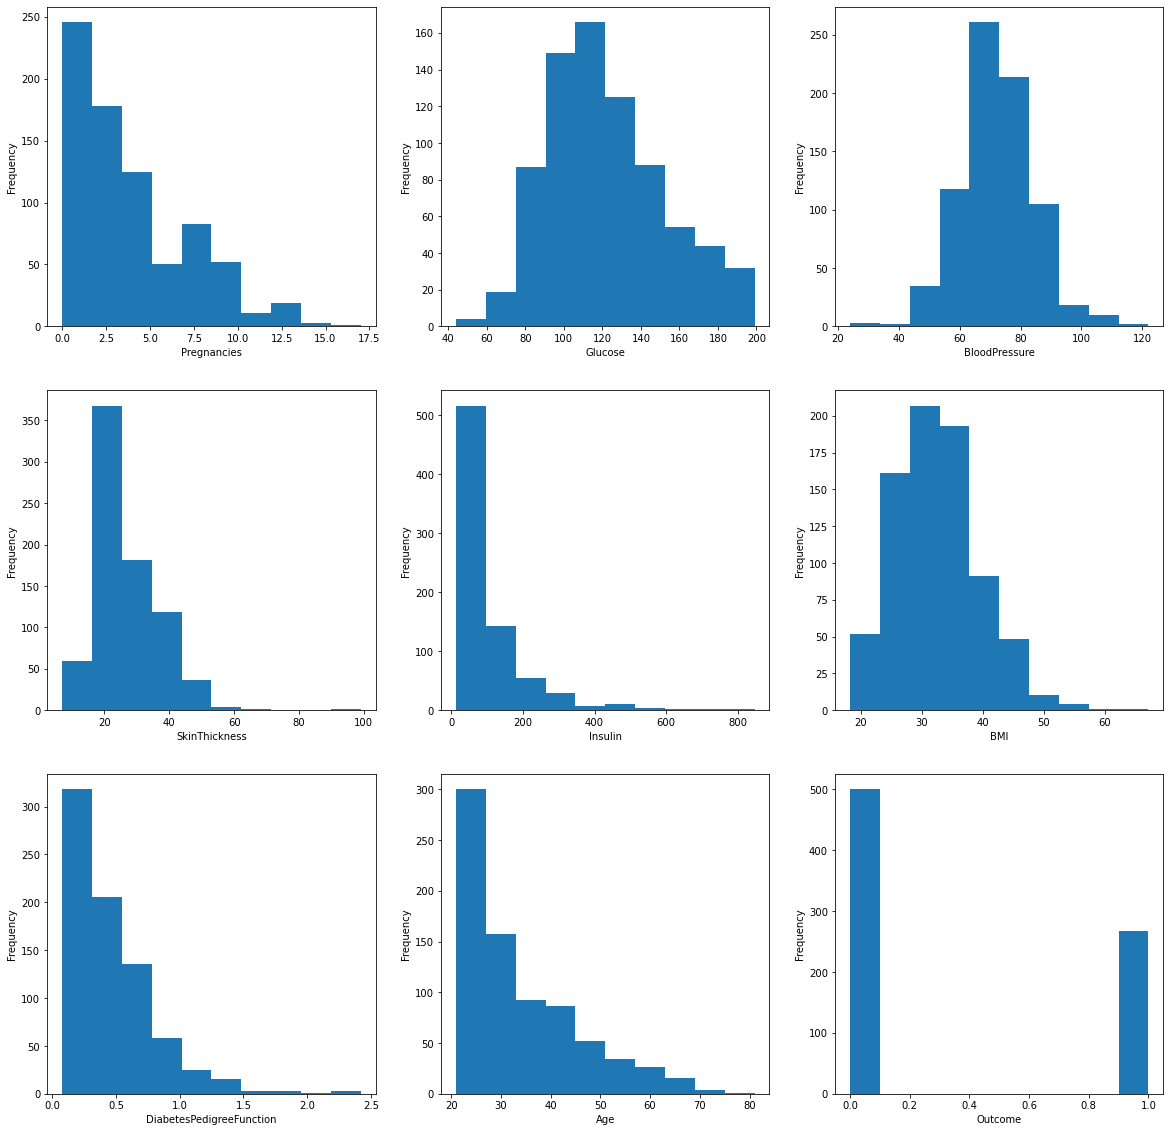

In [14]:
fig = plt.figure(figsize=(20,20))
i=0
for column in data:
    sub = fig.add_subplot(3,3,i+1)
    sub.set_xlabel(column)
    sub.set_ylabel("frequency")
    data[column].plot(kind='hist')
    i=i+1

##### 4.2 : Visualise the co-relation for all variables in Health-care dataset.

In [15]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


##### 4.3 : Plot heatmap for co-relation of variables.

<AxesSubplot:>

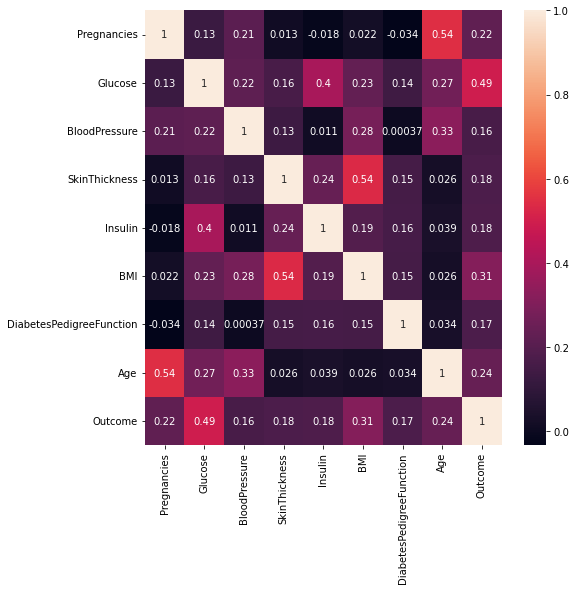

In [16]:
plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

##### Clearly, Glucose has the most impact on Outcome.

##### 4.4 : Plot pair plot for all variables to chec for multicolinearity.

Text(0.5, 1.0, 'Scatter plot between variables')

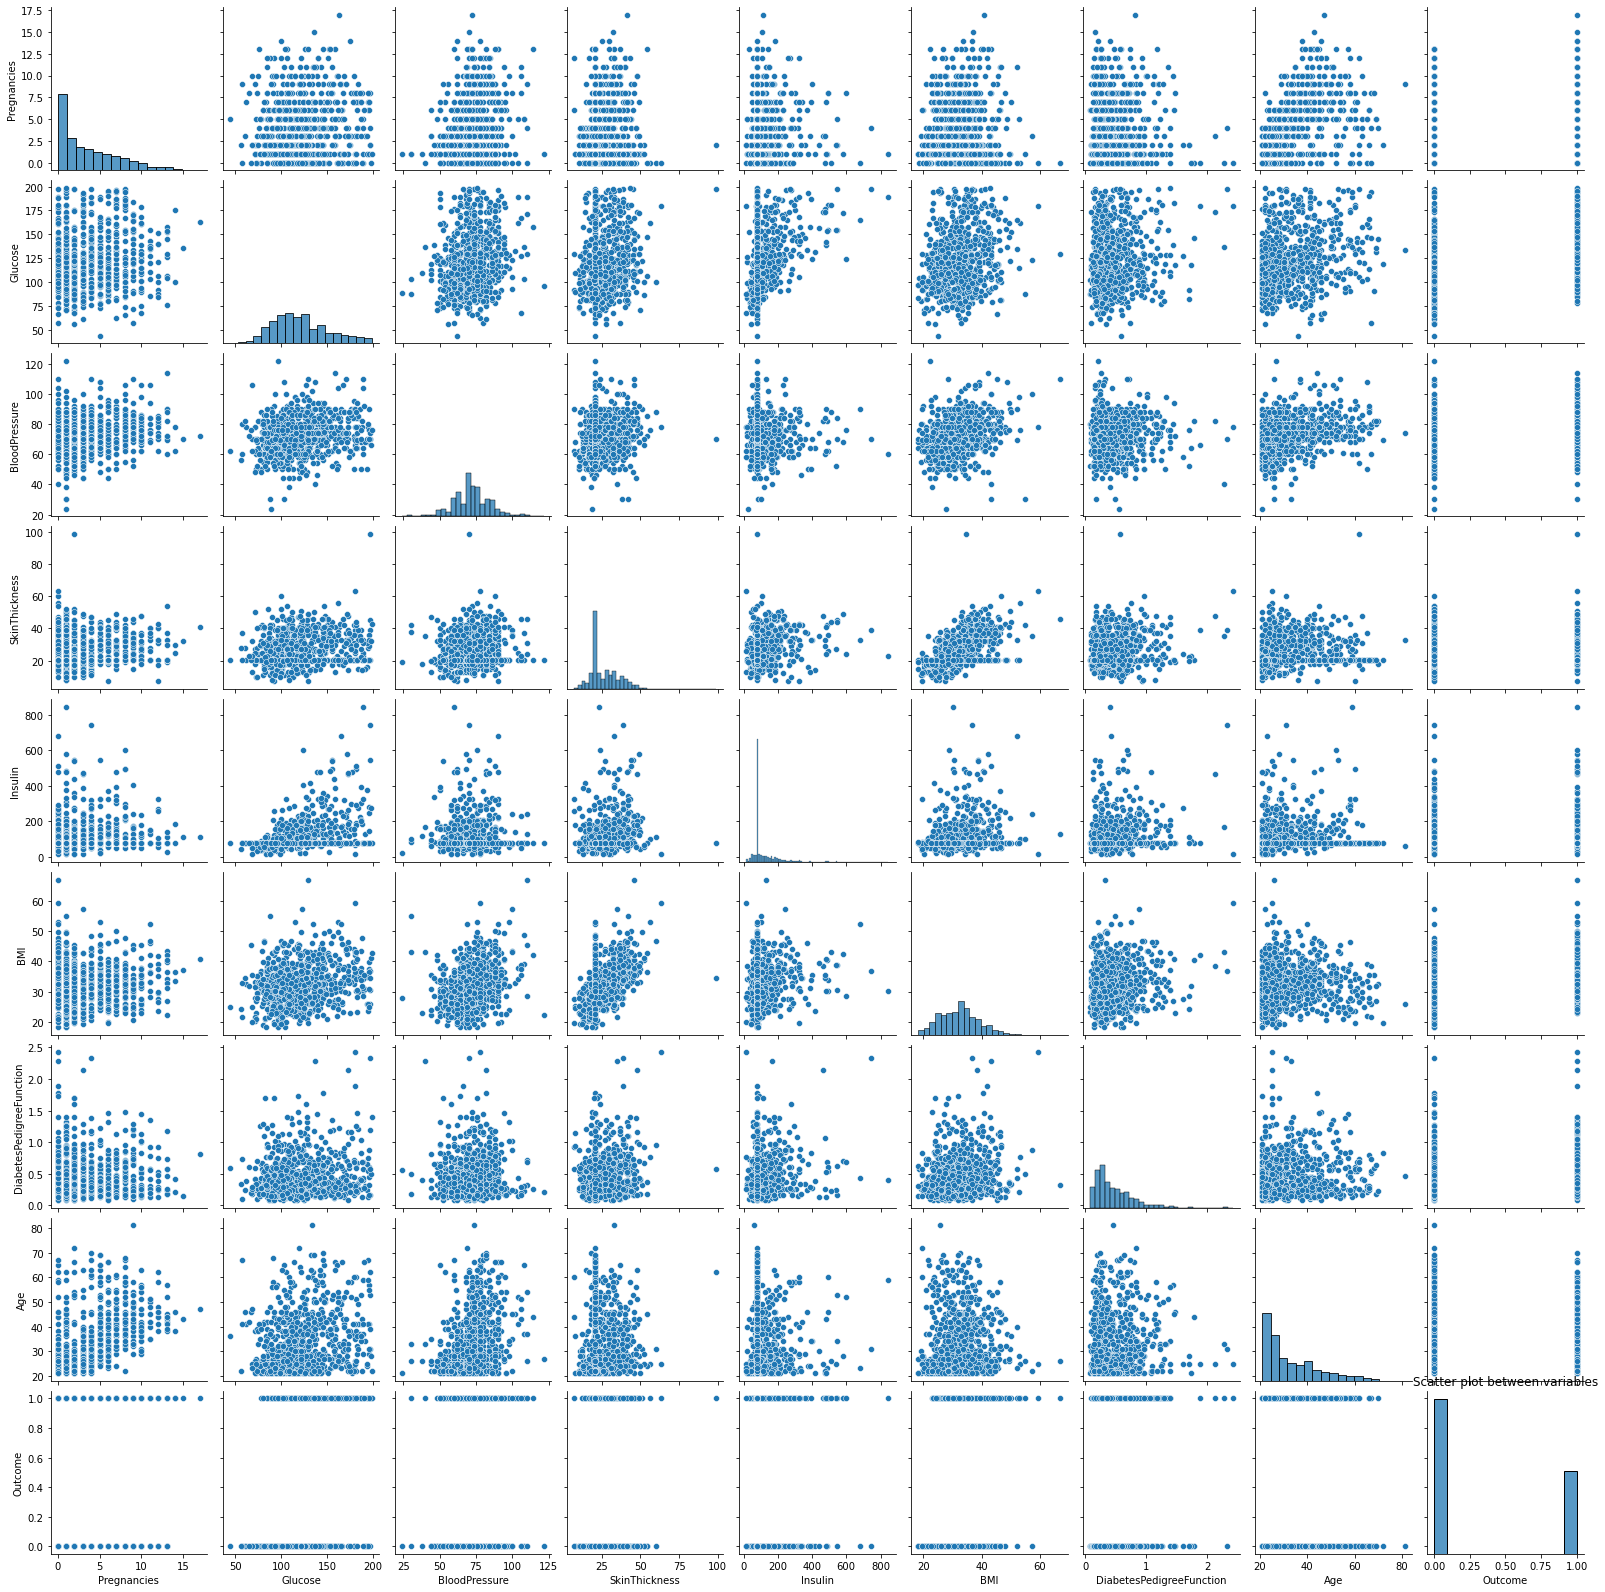

In [17]:
sns.pairplot(data)
plt.title('Scatter plot between variables')

## Step 5 : Visulaise the data based on Outcome : "Diabetic" or "Non-Diabetic" 

#### 5.1: Perform EDA based on Outcome values : 

In [18]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 1 represents the patient is Diabetic, implies Positive
### 0 represents the patients is Non-Diabetic , implies Negative

In [19]:
data.groupby('Outcome').mean() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


#### 5.2 Plot Boxplot for all variables based on Outcome

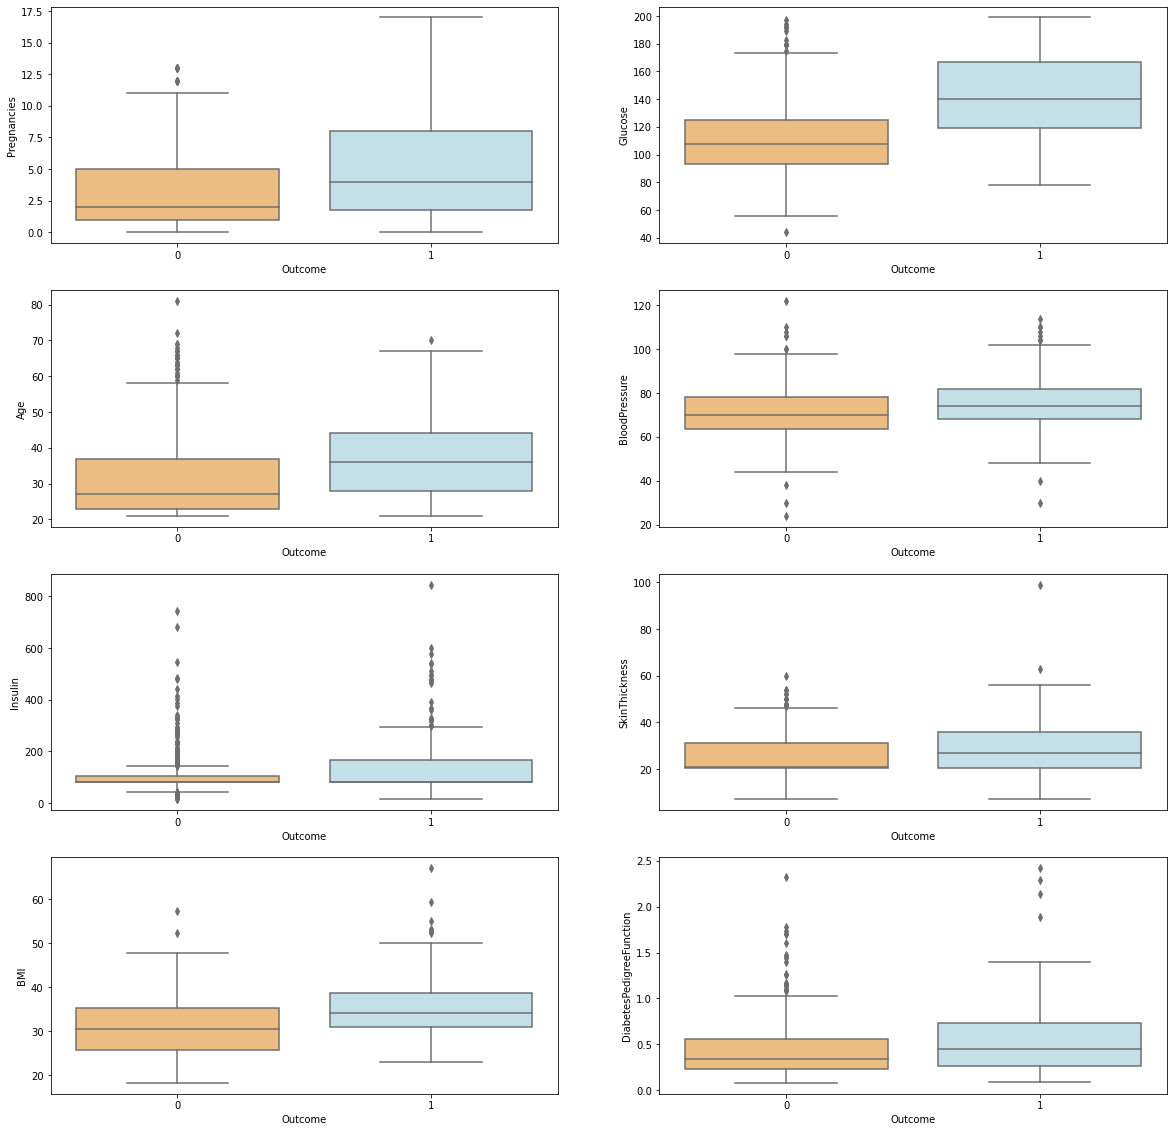

In [20]:
features = ['Pregnancies', "Glucose","Age","BloodPressure","Insulin",
            "SkinThickness","BMI","DiabetesPedigreeFunction"]
fig = plt.figure(figsize=(20,20))
i=0
for i in range(len(features)):
    column = features[i]
    sub = fig.add_subplot(4,2,i+1)
    chart = sns.boxplot(data=data,x="Outcome",y=column,palette ="RdYlBu")

#### 5.3 : Plot bar plot for selected features based on Outcome, to see which has more affect for Outcome being Diabetic

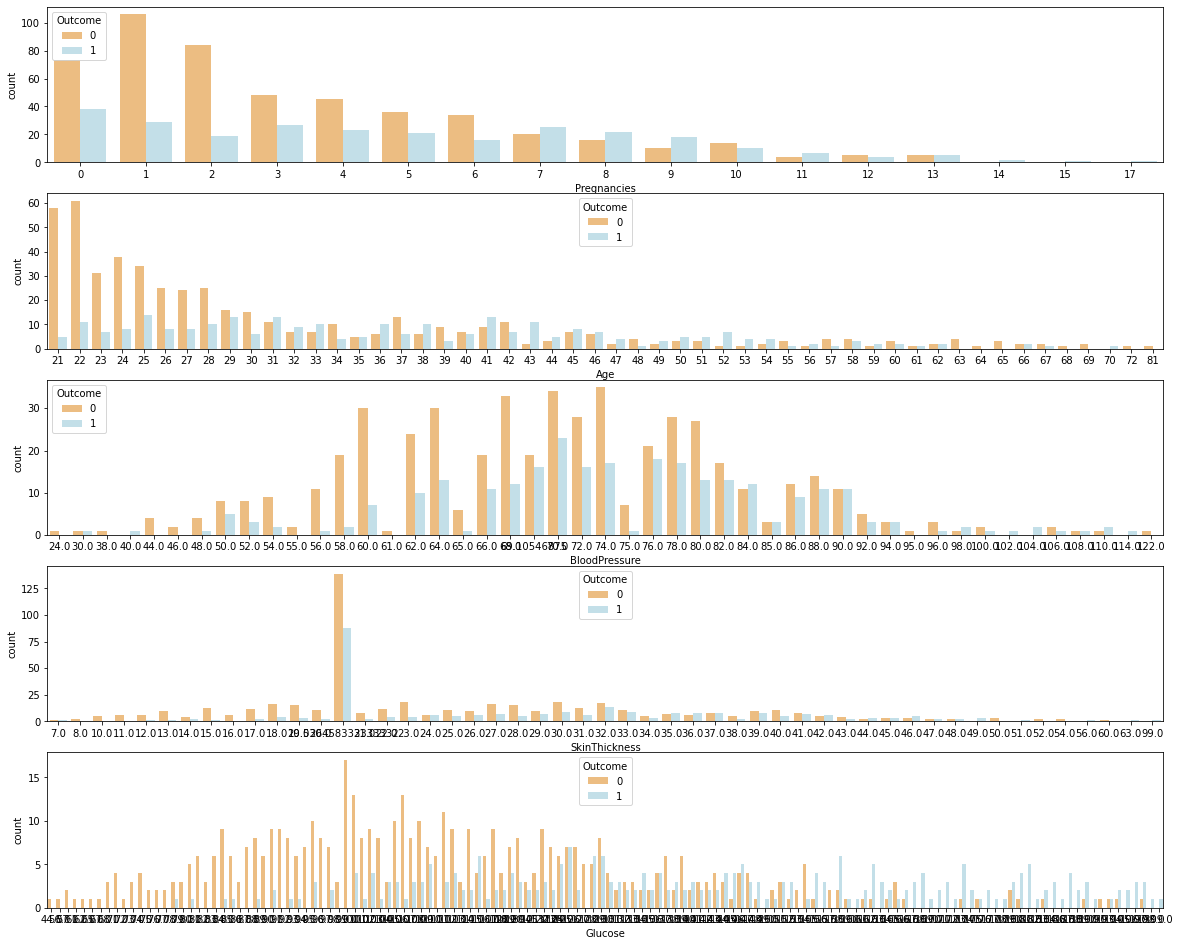

In [21]:
features = ['Pregnancies',"Age","BloodPressure","SkinThickness","Glucose"]
fig = plt.figure(figsize=(20,20))
for i in range(len(features)):
    column = features[i]
    sub = fig.add_subplot(6,1,i+1)
    chart = sns.countplot(data=data,x=column,hue="Outcome",palette ="RdYlBu")

#### 5.4:  Plot scatter plots for 2 most relevant variables based on Outcome

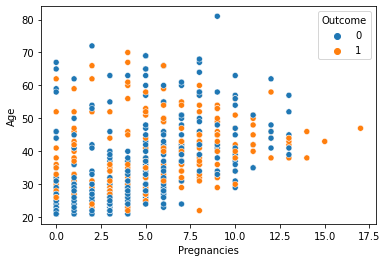

In [22]:
a =sns.scatterplot(x= "Pregnancies" ,y= "Age",
              hue="Outcome",
              data=data);

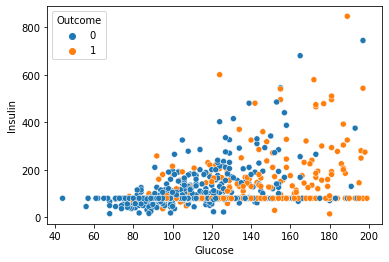

In [23]:
b =sns.scatterplot(x= "Glucose" ,y= "Insulin",
              hue="Outcome",
              data=data);

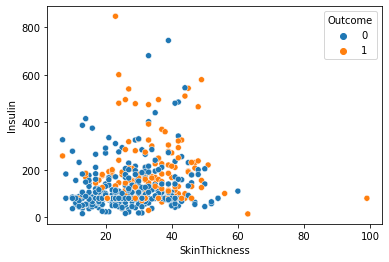

In [24]:
c = sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=data);

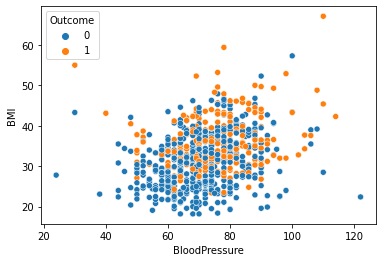

In [25]:
d =sns.scatterplot(x= "BloodPressure" ,y= "BMI",
              hue="Outcome",
              data=data);

## Step 6 : Filter and Visualise data for only Diabetic patient.

#### 6.1 : Create a data by filtering the data for Ouctome = 1

In [26]:
Positive = data[data['Outcome']==1]
Positive

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.000000,110.000000,36.5,1.057,37,1
757,0,123.0,72.0,20.536458,79.799479,36.3,0.258,52,1
759,6,190.0,92.0,20.536458,79.799479,35.5,0.278,66,1
761,9,170.0,74.0,31.000000,79.799479,44.0,0.403,43,1


#### 6.2: Understand the variables and their corresponding values for created data : Positive

##### 6.2.1 : Frequency of unique values in each variable.

In [27]:
for i in Positive.columns:
    print(i,'---->',Positive[i].value_counts(),'\n')

Pregnancies ----> 0     38
1     29
3     27
7     25
4     23
8     22
5     21
2     19
9     18
6     16
10    10
11     7
13     5
12     4
14     2
15     1
17     1
Name: Pregnancies, dtype: int64 

Glucose ----> 125.0    7
128.0    6
129.0    6
115.0    6
158.0    6
        ..
165.0    1
116.0    1
193.0    1
172.0    1
190.0    1
Name: Glucose, Length: 104, dtype: int64 

BloodPressure ----> 70.000000     23
76.000000     18
78.000000     17
74.000000     17
72.000000     16
69.105469     16
80.000000     13
64.000000     13
82.000000     13
84.000000     12
68.000000     12
66.000000     11
88.000000     11
90.000000     11
62.000000     10
86.000000      9
60.000000      7
50.000000      5
52.000000      3
92.000000      3
85.000000      3
94.000000      3
54.000000      2
110.000000     2
98.000000      2
104.000000     2
58.000000      2
48.000000      1
106.000000     1
100.000000     1
75.000000      1
102.000000     1
65.000000      1
40.000000      1
108.000000     1
96

##### 6.2.3 : plotting the histogram : variables vs frequency 

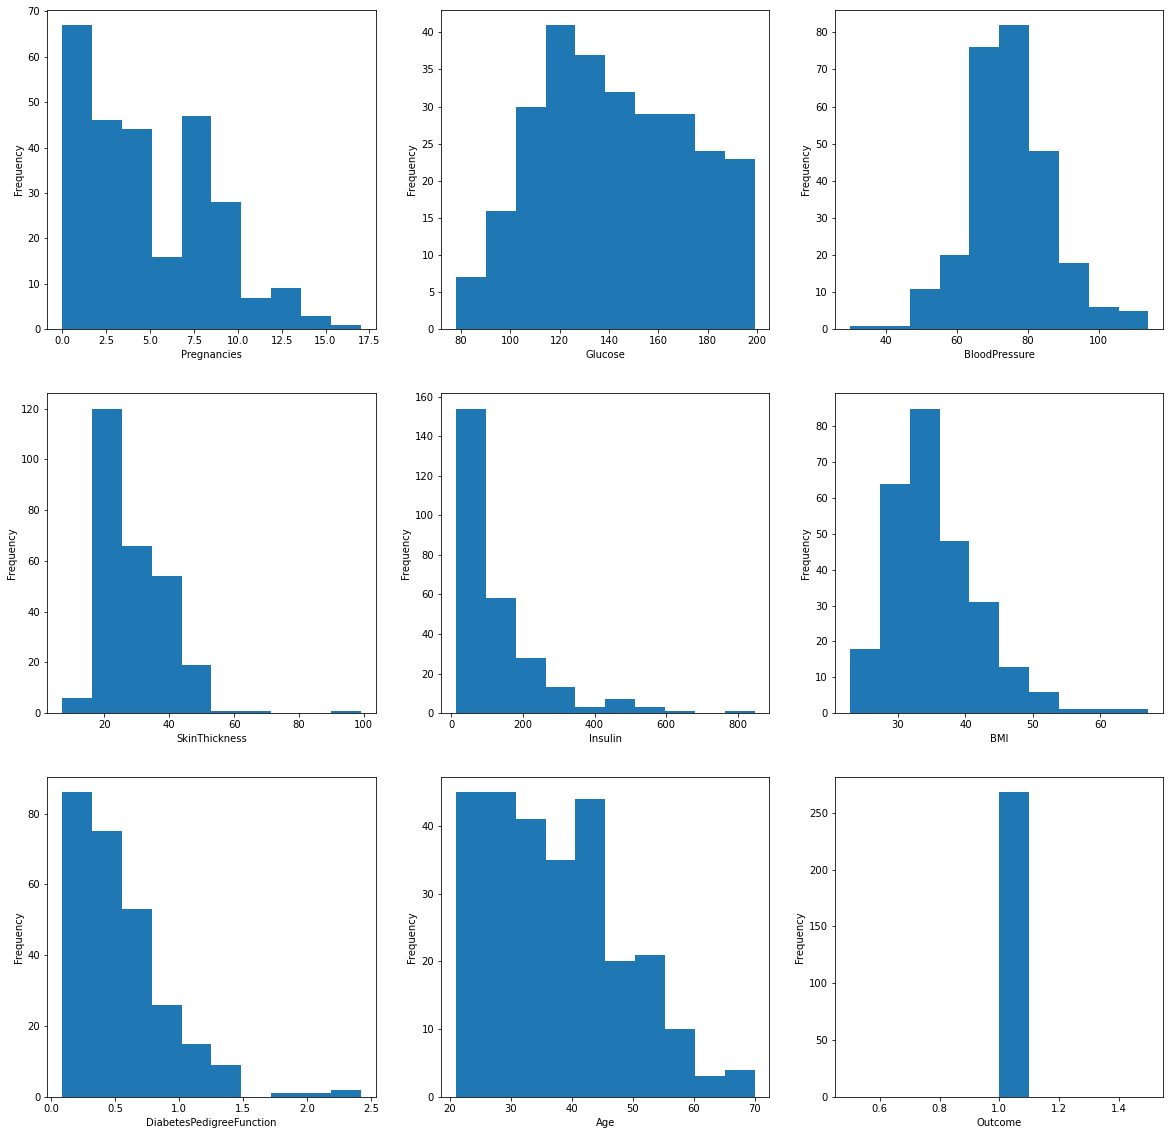

In [28]:
fig = plt.figure(figsize=(20,20))
i=0
for column in Positive:
    sub = fig.add_subplot(3,3,i+1)
    sub.set_xlabel(column)
    sub.set_ylabel("frequency")
    Positive[column].plot(kind='hist')
    i=i+1

#### 6.3 : Plot the pair plots accross all variables in Positive dataset

Text(0.5, 1.0, 'Scatter plot between variables')

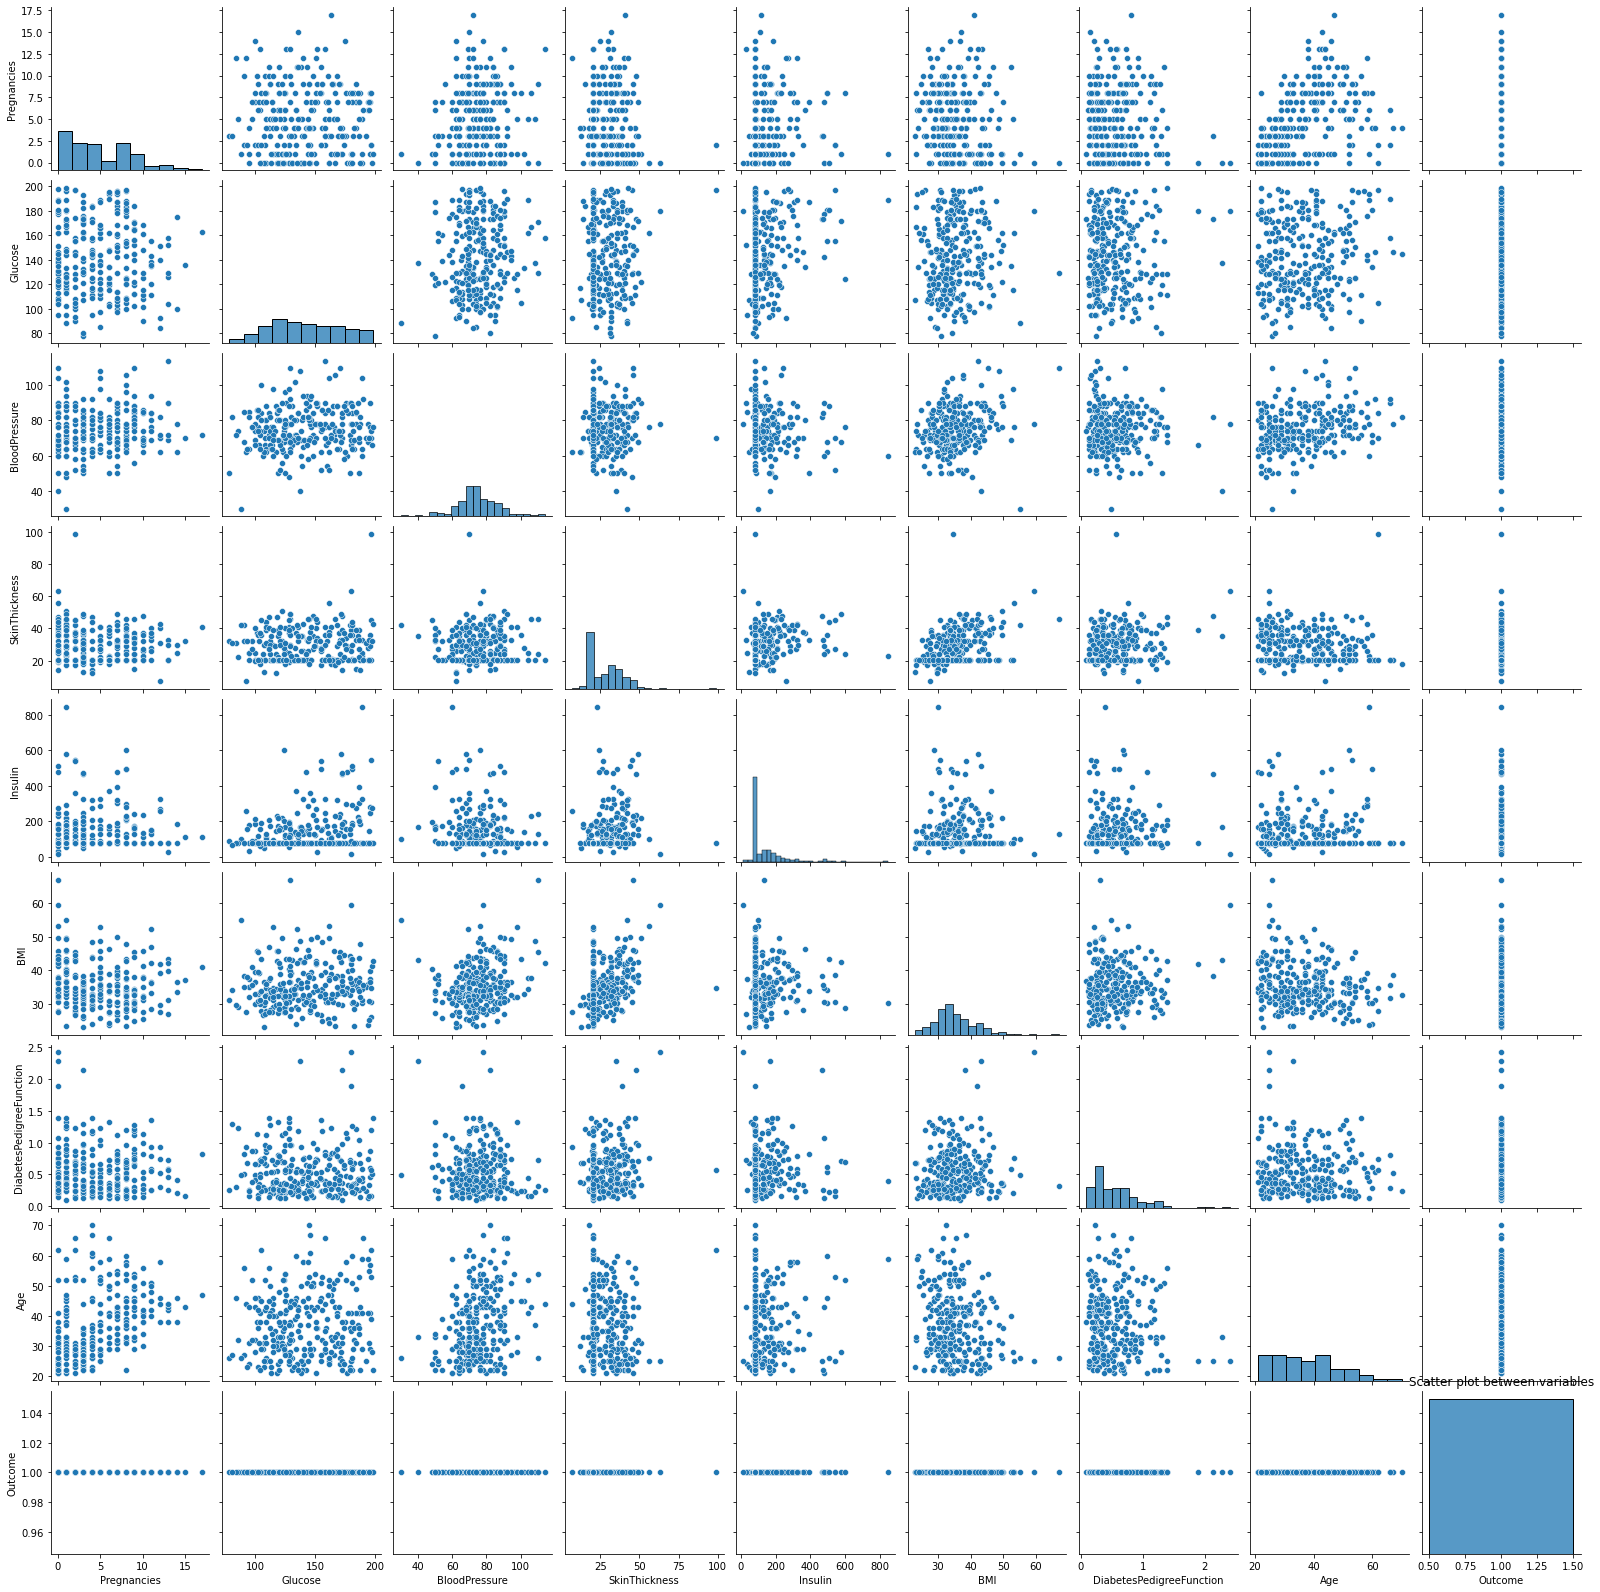

In [29]:
sns.pairplot(Positive)
plt.title('Scatter plot between variables')

#### 6.4 Find the co-relation of variables.

In [30]:
Positive.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,-0.053818,0.141577,-0.096412,-0.060498,-0.134992,-0.069195,0.444987,NaN
Glucose,-0.053818,1.000000,0.102611,0.083713,0.286685,0.055330,0.027466,0.111951,NaN
BloodPressure,0.141577,0.102611,1.000000,0.044983,-0.085558,0.230656,-0.049202,0.294895,NaN
SkinThickness,-0.096412,0.083713,0.044983,1.000000,0.245295,0.408517,0.235961,-0.086468,NaN
Insulin,-0.060498,0.286685,-0.085558,0.245295,1.000000,0.021738,0.055791,0.065321,NaN
BMI,-0.134992,0.055330,0.230656,0.408517,0.021738,1.000000,0.120914,-0.190662,NaN
DiabetesPedigreeFunction,-0.069195,0.027466,-0.049202,0.235961,0.055791,0.120914,1.000000,-0.088119,NaN
Age,0.444987,0.111951,0.294895,-0.086468,0.065321,-0.190662,-0.088119,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 6.5 Plot Heat map for co-relation of varibales.

<AxesSubplot:>

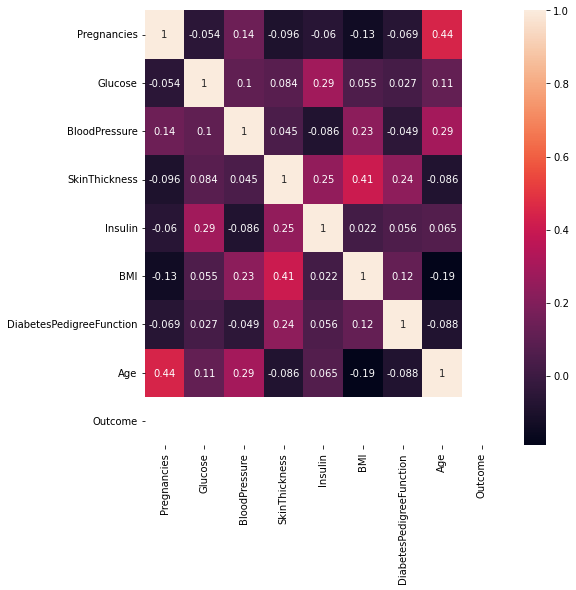

In [31]:
plt.subplots(figsize=(8,8))
sns.heatmap(Positive.corr(),annot=True)

## Step 7: Separate Target and Feature Variable :

In [32]:
X = data.drop(columns = "Outcome",axis=1)
Y = data["Outcome"]

## Step 8 : Standardise the data:

In [33]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

X_data = scale.fit_transform(X)
X_data = pd.DataFrame(data=X_data,columns=X.columns)
X_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679954,0.309315,2.222711,0.659428,0.065376,-0.908682,2.532136
764,-0.547919,0.010468,-0.186224,0.040885,-0.417768,0.632988,-0.398282,-0.531023
765,0.342981,-0.022409,-0.021044,-0.374700,-0.071599,-0.909751,-0.685193,-0.275760
766,-0.844885,0.141977,-1.012121,-0.630654,-0.417768,-0.342140,-0.371101,1.170732


## Step 9 : Data Modeling 

### 9.1 : Split the data set :train and test

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_data, Y, test_size=0.2, random_state =1000)

print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### 9.2 : Create a machine learning model pipeline which contains a list of model from which. we want to compare and find the most appropiate algorithm. The list includes:
#### a. Logistic Regression
#### b. KNeighbors Classifier
#### c. Support Vector Classifier
#### d. Random Forest Classifier
#### e. Desicion Tree Classifier
#### f. Gaussian Naive Bayes

In [35]:
### Import the model:

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC 

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB




model_pipeline = []    ### create a pipeline model_pipeline

### Append the models and make some necessary updates to their parameters for better model performance.

model_pipeline.append(LogisticRegression(solver="liblinear"))

model_pipeline.append(KNeighborsClassifier(n_neighbors=5,
                             metric='minkowski',
                             p = 2))

model_pipeline.append(DecisionTreeClassifier(max_depth=10))

model_pipeline.append(RandomForestClassifier(n_estimators=1000,random_state=0,max_depth=6))

model_pipeline.append(GaussianNB())

model_pipeline.append(SVC(probability=True))

### Step 9.3 : Fit model for train dataset 

In [36]:
for model in model_pipeline:
    model.fit(X_train,Y_train)    

## Step 10 : Model Evaluation 

### Step 10.1 : Fetch Classification_Report for predictied data by each model. 

In [37]:
from sklearn.metrics import classification_report
from sklearn import metrics
for model in model_pipeline:
    print("MODEL NAME : ",model,"\n\n",classification_report(Y,model.predict(X_data)),"\n\n\n")

MODEL NAME :  LogisticRegression(solver='liblinear') 

               precision    recall  f1-score   support

           0       0.80      0.88      0.84       500
           1       0.72      0.59      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768
 



MODEL NAME :  KNeighborsClassifier() 

               precision    recall  f1-score   support

           0       0.84      0.88      0.86       500
           1       0.75      0.70      0.72       268

    accuracy                           0.82       768
   macro avg       0.80      0.79      0.79       768
weighted avg       0.81      0.82      0.81       768
 



MODEL NAME :  DecisionTreeClassifier(max_depth=10) 

               precision    recall  f1-score   support

           0       0.93      0.94      0.94       500
           1       0.88      0.87      0.88       268

    accuracy            

### Step 10.2 : Fetch model_score ; accuracy score of original and predicted data .
#### Accuracy score is the indicator of model performance.

In [38]:
#importing

model_score = []
acc_list = []

for model in model_pipeline:
    
    y_pred = model.predict(X_test)
    
    model_score.append(model.score(X_train,Y_train))
    
    acc_list.append(metrics.accuracy_score(Y_test,y_pred))

model_list=['Logistic_Regression','KNN Classifier','Decision Tree Classifier','Random Forest Classifier','GaussianNB','SVC']

score_list = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list})
score_list

,Model,Model_score,Accuracy
0,Logistic_Regression,0.785016,0.733766
1,KNN Classifier,0.833876,0.740260
2,Decision Tree Classifier,0.973941,0.681818
3,Random Forest Classifier,0.885993,0.740260
4,GaussianNB,0.757329,0.720779
5,SVC,0.833876,0.727273


#### Accuracy Score of Random Forest Classifier is the highest.
#### Model with Least accuracy score is Decision Tree classifier. 

### Step 10.3 : Plot Confusion Matrix for each model
#### Confusion matrix indicates the actual values vs. predicted values and summarize the true negative, false positive, false negative and true positive values in a matrix format.

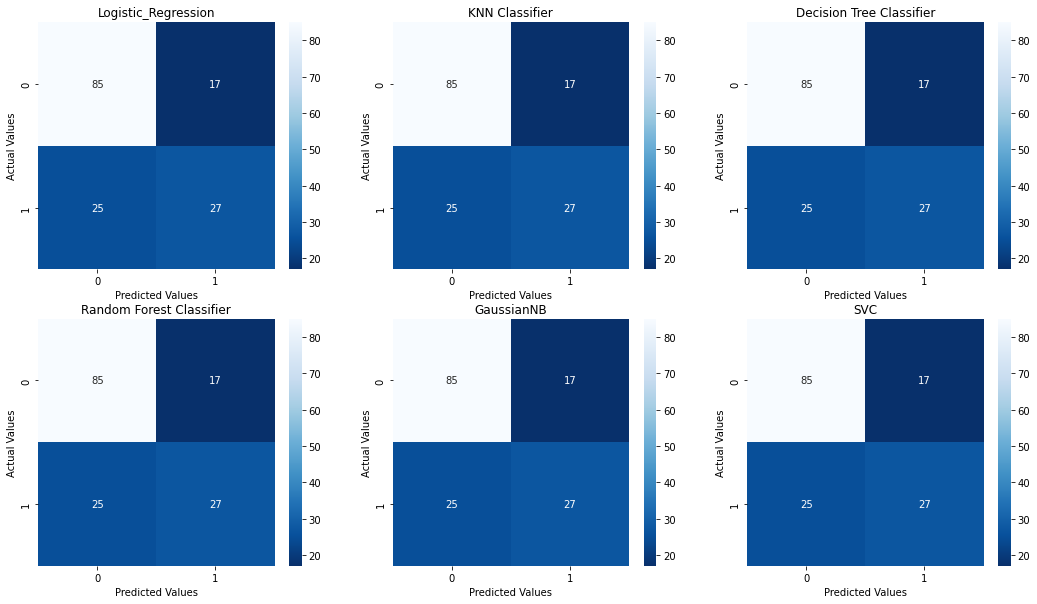

In [39]:
## plot confusion Matrix 

from sklearn.metrics import confusion_matrix
cm_list = []

for model in model_pipeline:
    cm_list.append(confusion_matrix(Y_test,y_pred))


fig = plt.figure(figsize=(18,10))

for i in range (len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm,annot=True,cmap ='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

### Step 10.4 : Plot ROC Curve for each model : 
#### ROC is the plot of true positive rate against false positive rate at various classification threshold. 
#### AUC is the area under the ROC curve, and higher AUC indicates better model performance.

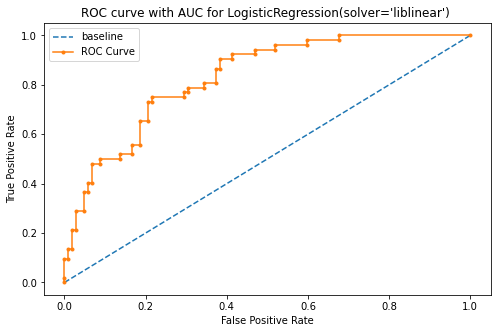

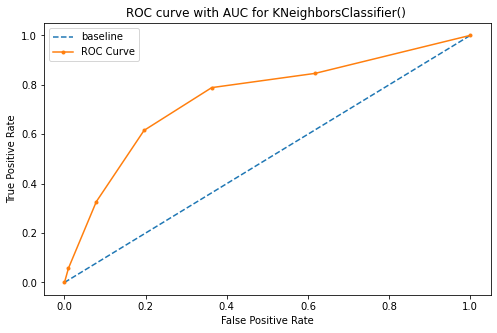

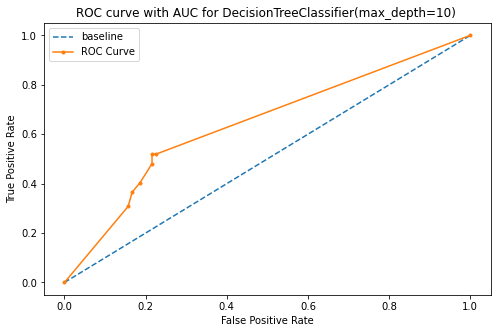

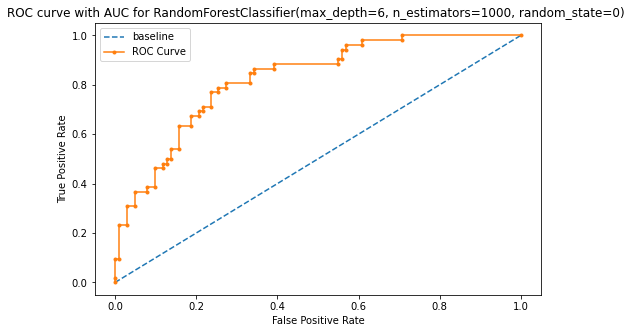

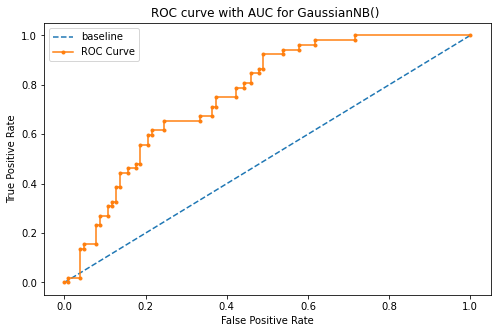

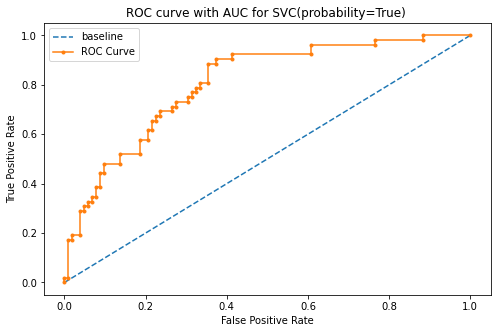

In [40]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc_roc=[] # list to store model roc_auc_score 
b_auc=[]
for model in model_pipeline:
    # generate a baseline prediction (majority class)
    baseline_probs = [0 for _ in range(len(Y_test))]
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate scores
    auc_roc.append(roc_auc_score(Y_test, probs))
    b_auc.append(roc_auc_score(Y_test,baseline_probs))
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    bl_fpr, bl_tpr, thresholds = roc_curve(Y_test, baseline_probs) 
    # plot the roc curve for the model
    fig = plt.figure(figsize=(8,5))
    plt.plot(bl_fpr,bl_tpr, linestyle='--',label='baseline')
    plt.plot(fpr, tpr, marker='.',label='ROC Curve')
    # plot title
    plt.title("ROC curve with AUC for {} ".format(model))
    # axis labels
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # show the legend
    plt.legend()
    

In [41]:
AUC_score = pd.DataFrame({'Model':model_list, 'roc_auc_score': auc_roc ,'baseline_auc' :b_auc})
AUC_score

,Model,roc_auc_score,baseline_auc
0,Logistic_Regression,0.830128,0.5
1,KNN Classifier,0.747172,0.5
2,Decision Tree Classifier,0.641403,0.5
3,Random Forest Classifier,0.825226,0.5
4,GaussianNB,0.759238,0.5
5,SVC,0.805807,0.5


#### Since , higher AUC indicates better model performance : Logistic_regression has Highest auc score , Random Forest Classifier is off by 0.1 score.
#### While, Decision Tree Classifier has least AUC score

### Step 10.5 Plot Precision Recall curve for each model :
#### The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

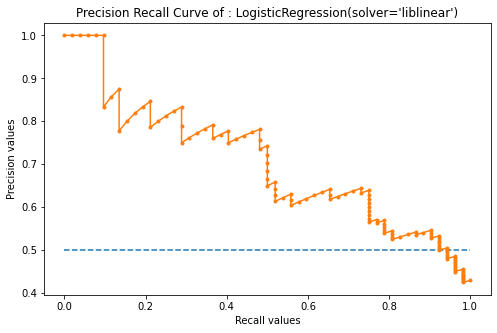

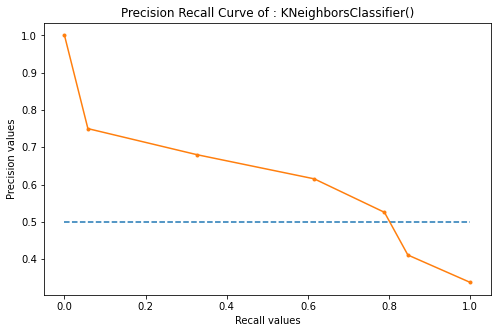

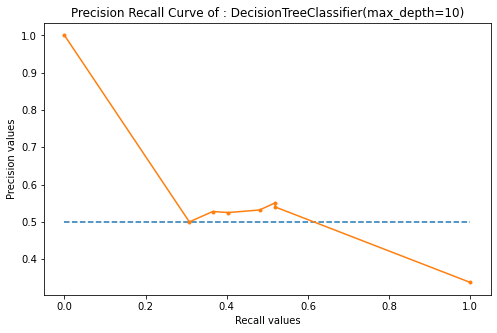

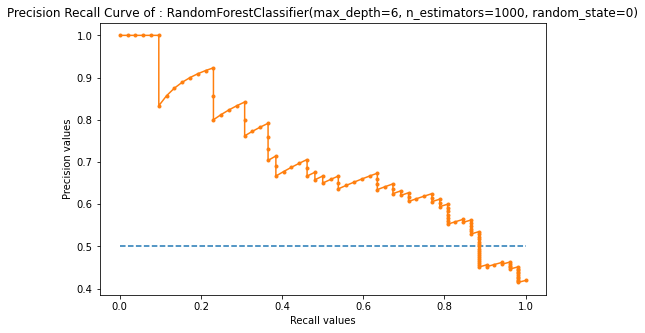

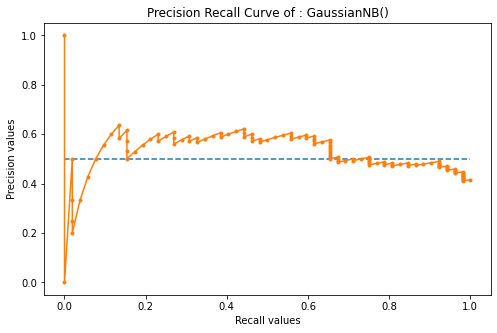

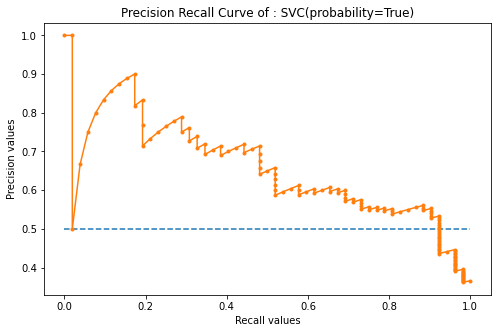

In [42]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


auc_pc=[]
ap=[]
f1=[]
for model in model_pipeline:
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:,1]
    # predict class values
    prediction = model.predict(X_test)
    precision, recall,thresholds = precision_recall_curve(Y_test, probs)
    auc_pc.append(metrics.auc(recall, precision))
    f1.append(f1_score(Y_test, prediction))
    ap.append(average_precision_score(Y_test, probs))
    
    # plot the precision-recall curves
    fig = plt.figure(figsize=(8,5))
    
    plt.ylabel("Precision values")
    plt.xlabel("Recall values")
    
    plt.title("Precision Recall Curve of : %s"%model)
    
    plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = "baseline")
    plt.plot(recall, precision, marker='.',label="PR curve")


#### Random Forest Classifier covers the larger area under its curve, its AUC score is highest.
#### While, GaussianNB covers the least area under its curve.

### Step 10.6 Summarize the Model Evaluation : 

In [43]:
result = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list, 
                       'roc_auc_score': auc_roc, 'f1-score': f1,'precision-recall AUC': auc_pc, 
                       'average precision score': ap })
result

,Model,Model_score,Accuracy,roc_auc_score,f1-score,precision-recall AUC,average precision score
0,Logistic_Regression,0.785016,0.733766,0.830128,0.577320,0.703565,0.707621
1,KNN Classifier,0.833876,0.740260,0.747172,0.615385,0.613188,0.570509
2,Decision Tree Classifier,0.973941,0.681818,0.641403,0.505051,0.553115,0.428934
3,Random Forest Classifier,0.885993,0.740260,0.825226,0.583333,0.706242,0.710015
4,GaussianNB,0.757329,0.720779,0.759238,0.590476,0.526981,0.540699
5,SVC,0.833876,0.727273,0.805807,0.562500,0.655245,0.662659


### My top 2 ML models are : Logistic Regressor and  Random Forest Classifier.
### From above Evaluation and Comparison ,even though Logostic Regressor has highest roc_auc_curve ,  Random Forest Classifier has highest score all other areans so, Random Forest Classifier seems to be the most appropiate machine learning model.

## Step 11 : Comapre the models with KNN algorithm. 

LogisticRegression(solver='liblinear'):
 Mean: 0.776042
 Std: (0.052590) 
 Max:(0.831169)


KNeighborsClassifier():
 Mean: 0.747386
 Std: (0.052152) 
 Max:(0.818182)


DecisionTreeClassifier(max_depth=10):
 Mean: 0.697864
 Std: (0.060576) 
 Max:(0.805195)


RandomForestClassifier(max_depth=6, n_estimators=1000, random_state=0):
 Mean: 0.757758
 Std: (0.070037) 
 Max:(0.857143)


GaussianNB():
 Mean: 0.744771
 Std: (0.043265) 
 Max:(0.844156)


SVC(probability=True):
 Mean: 0.764320
 Std: (0.056272) 
 Max:(0.844156)




Text(0.5, 1.0, 'Model Comparision')

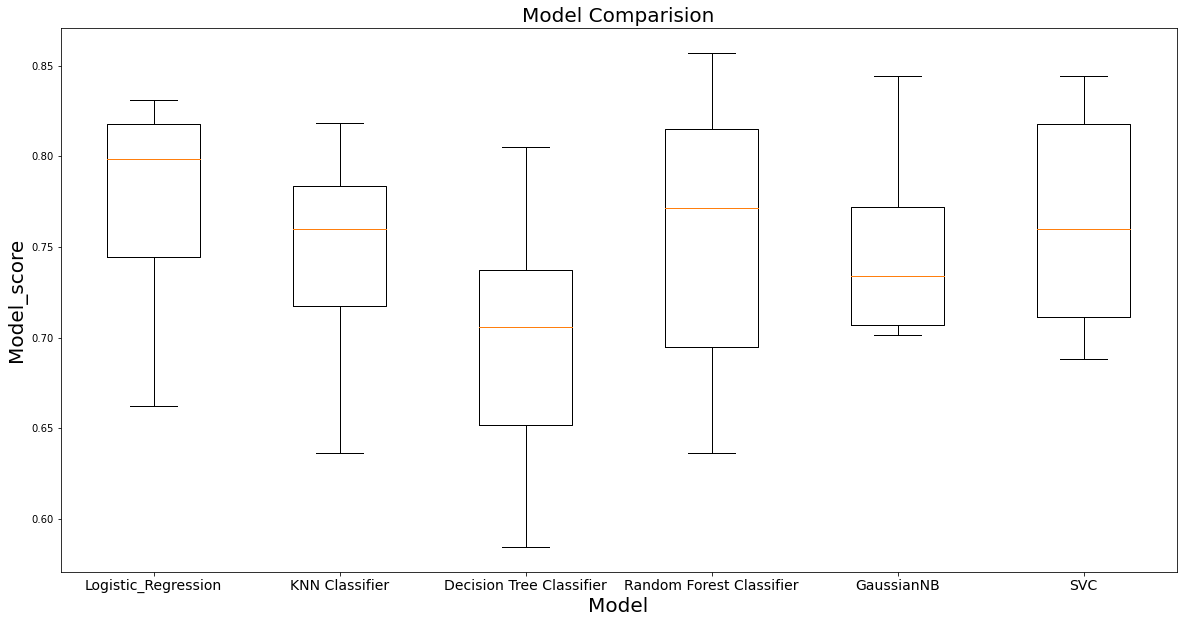

In [44]:
from sklearn import model_selection
seed = 7
results = []
names = [model_list]
scoring = 'accuracy'
for model in model_pipeline:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_data, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s:\n Mean: %f\n Std: (%f) \n Max:(%f)\n\n" % (model, cv_results.mean(), cv_results.std(), cv_results.max())
    print(msg)  
fig = plt.figure(figsize=(20,10))
plt.boxplot(results)
plt.ylabel("Model_score",fontsize =20)
plt.xlabel("Model",fontsize=20)
plt.xticks(range(1,len(model_list)+1), model_list,fontsize =14)
plt.title("Model Comparision",fontsize =20)

### Judging from KNN algorithm model comparison , Clearly Random Forest Classifier shows better performance 

### With all the evaluation and comparision, Random Forest Classifer turns to be the best model for our data.

In [45]:
model_chosen = RandomForestClassifier(n_estimators=13,max_depth=15)
model_chosen.fit(X_train,Y_train)
print(model_chosen.score(X_train,Y_train))
y_pred = model_chosen.predict(X_test)
print(metrics.accuracy_score(y_pred,Y_test))


0.993485342019544
0.7207792207792207
